In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('HeartDisease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Independent & Dependent Feature
y = df["target"]
X = df.drop("target", axis=1)

In [11]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## 1. Decission Tree Classifier

In [23]:
# train the Decission Tree mode
from sklearn.tree import DecisionTreeClassifier
tree_classsifier = DecisionTreeClassifier()
tree_classsifier.fit(X_train,y_train)

DecisionTreeClassifier()

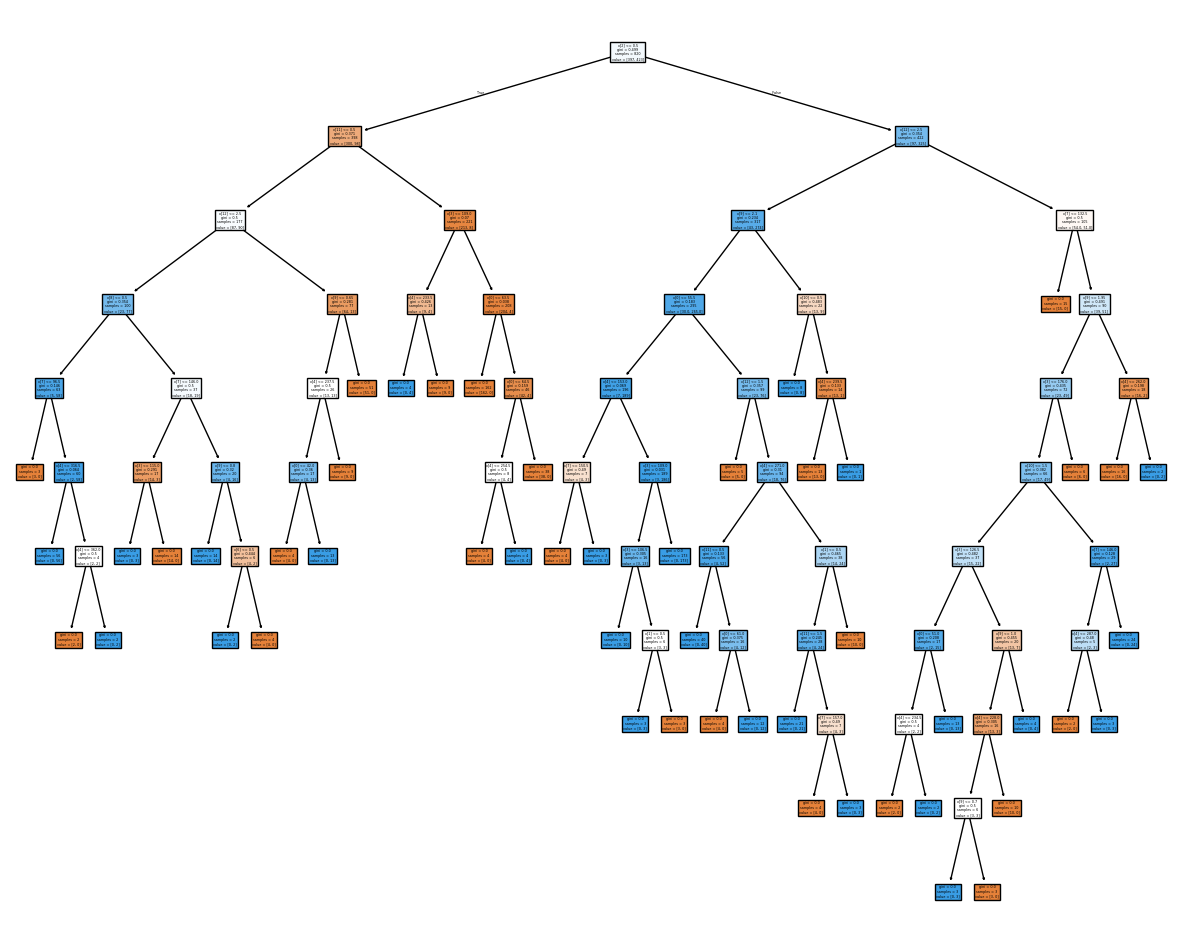

In [24]:
# vizualize the tree
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(tree_classsifier,filled=True)
plt.show()

In [25]:
# Predict
y_pred = tree_classsifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('accuracy_score','\n',accuracy_score(y_test,y_pred),'\n')
print('confusion matrix','\n',confusion_matrix(y_test,y_pred),'\n')
print('classification report','\n',classification_report(y_test,y_pred))

accuracy_score 
 0.9853658536585366 

confusion matrix 
 [[102   0]
 [  3 100]] 

classification report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [27]:
# Prunning
params = {
    'criterion':["gini","entropy","log_loss"],
    'splitter':["best","ramdom"],
    'max_depth':[1,2,3,4,5],
    'max_features':["auto","sqrt","log2"]
}

In [28]:
# Hyperparameter Tunning 
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier()
grid = GridSearchCV(treemodel,param_grid=params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'ramdom']},
             scoring='accuracy')

In [29]:
print(f"Best Score : {grid.best_score_}")

Best Score : 0.874390243902439


In [30]:
y_pred = grid.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [31]:
print('accuracy score','\n',accuracy_score(y_test,y_pred),'\n')
print('confusion matrix','\n',confusion_matrix(y_test,y_pred),'\n')
print('classification report','\n',classification_report(y_test,y_pred))

accuracy score 
 0.8634146341463415 

confusion matrix 
 [[85 17]
 [11 92]] 

classification report 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       102
           1       0.84      0.89      0.87       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



## 2. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [47]:
# train the Decission Tree mode
models = {"Model Name : Random Forest":RandomForestClassifier()}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1_score = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1_score = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance For Training Set")
    print("Accuracy: {:.4f}".format(model_train_accuracy))
    print("F1 Score: {:.4f}".format(model_train_f1_score))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("Roc Auc Score: {:.4f}".format(model_train_roc_auc_score))

    print("---------------------------------------------------------")

    print("Model Performance For Test Set")
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("F1 Score: {:.4f}".format(model_test_f1_score))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))

Model Name : Random Forest
Model Performance For Training Set
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Roc Auc Score: 1.0000
---------------------------------------------------------
Model Performance For Test Set
Accuracy: 0.9854
F1 Score: 0.9854
Precision: 1.0000
Recall: 0.9709
Roc Auc Score: 0.9854


In [48]:
# Hyperparameter Tunning
params = {"max_depth":[5,8,15,None,10],
          "max_features":[5,7,'auto',8],
          "min_samples_split":[2,8,15,20],
          "n_estimators":[100,200,500,1000]}

In [49]:
# Model for hyperparameter tuning
rf_model = [("Random Forest",RandomForestClassifier(),params)]
rf_model

[('Random Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [50]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in rf_model:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,
                                n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------- Best Parameters for {model_name} ----------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------- Best Parameters for Random Forest ----------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 10}


In [52]:
# Again train the model

models = {"Model Name : Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split= 2,max_features= 5, max_depth=10)}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1_score = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1_score = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance For Training Set")
    print("Accuracy: {:.4f}".format(model_train_accuracy))
    print("F1 Score: {:.4f}".format(model_train_f1_score))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("Roc Auc Score: {:.4f}".format(model_train_roc_auc_score))

    print("---------------------------------------------------------")

    print("Model Performance For Test Set")
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("F1 Score: {:.4f}".format(model_test_f1_score))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))

Model Name : Random Forest
Model Performance For Training Set
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Roc Auc Score: 1.0000
---------------------------------------------------------
Model Performance For Test Set
Accuracy: 0.9854
F1 Score: 0.9854
Precision: 1.0000
Recall: 0.9709
Roc Auc Score: 0.9854


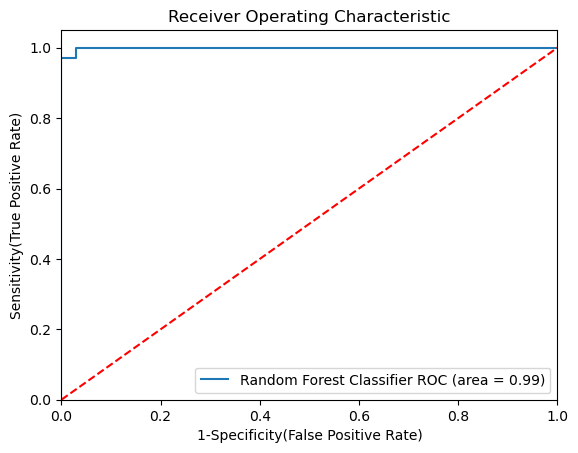

In [55]:
# Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the model to the list that you want to view on the ROC plot
auc_models = [{
                'label':'Random Forest Classifier',
                'model':RandomForestClassifier(n_estimators= 1000, min_samples_split= 2,
                                               max_features= 5, max_depth=10),
                'auc':0.9854
}]

# create loop through all model
for algo in auc_models:
    model = algo['model'] # Select the model
    model.fit(X_train,y_train) # train the model

# compute False Positive Rate & True Positive Rate 
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display in the plot
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)' % (algo['label'],algo['auc']))

# Custom setting for the plot
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()